### Find best interval
嘗試發掘資料(y值)是否有(短)週期性，可嘗試將 lstm 的時間區間取為周期的倍數。

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from collections import Counter

In [45]:
data = pd.read_csv("../MDS_Assignment3 Mining Process/MiningProcess_Flotation_Plant_Database.csv")
data = data.replace(",", ".", regex=True) 
display(data.head(3))

,date,% Iron Feed,% Silica Feed,Starch Flow,Amina Flow,Ore Pulp Flow,Ore Pulp pH,Ore Pulp Density,Flotation Column 01 Air Flow,Flotation Column 02 Air Flow,...,Flotation Column 07 Air Flow,Flotation Column 01 Level,Flotation Column 02 Level,Flotation Column 03 Level,Flotation Column 04 Level,Flotation Column 05 Level,Flotation Column 06 Level,Flotation Column 07 Level,% Iron Concentrate,% Silica Concentrate
0,2017-03-10 01:00:00,55.2,16.98,3019.53,557.434,395.713,10.0664,1.74,249.214,253.235,...,250.884,457.396,432.962,424.954,443.558,502.255,446.37,523.344,66.91,1.31
1,2017-03-10 01:00:00,55.2,16.98,3024.41,563.965,397.383,10.0672,1.74,249.719,250.532,...,248.994,451.891,429.56,432.939,448.086,496.363,445.922,498.075,66.91,1.31
2,2017-03-10 01:00:00,55.2,16.98,3043.46,568.054,399.668,10.068,1.74,249.741,247.874,...,248.071,451.24,468.927,434.61,449.688,484.411,447.826,458.567,66.91,1.31


In [46]:
# 3/10 ~ 4/15
data = data[:99999]
from datetime import datetime # generate
from dateutil import parser # parse
datelist = [parser.parse(d) for d in data['date']]
days = set()
[days.add(x.strftime('%m/%d')) for x in datelist]

# data['% Silica Concentrate'][0]
data_X = data.iloc[:, 1:-2].astype(float) # params
data_y = data.iloc[:, -1].astype(float) # label
datelist = datelist[:len(data)]

In [47]:
list(range(10,17))

[10, 11, 12, 13, 14, 15, 16]

In [48]:
datelist[0].day 

10

In [49]:
# 取 3/10~3/16 7天的資料
interval_index = []
start_index = 0
end_index = 0
for i,dt in enumerate(datelist):
    if dt.month == 4 and dt.day in list(range(12,17)): # 此行設定區間
        if start_index == 0:
            start_index = i
        end_index = i
        # interval_index.append(i)
# print(len(interval_index))
print('from idx', start_index, ',dest idx' , end_index)

from idx 85133 ,dest idx 99998


In [50]:
idx_start_0310 = 1
idx_end_0317 = 26813

idx_start_0412 = 85133
idx_end_0417 = 99998

In [51]:
print(len(data_y), len(datelist))

99999 99999


[['85133' '04/12']
 ['89453' '04/13']
 ['93773' '04/14']
 ['98093' '04/15']] [85133 89453 93773 98093] ['04/12' '04/13' '04/14' '04/15']


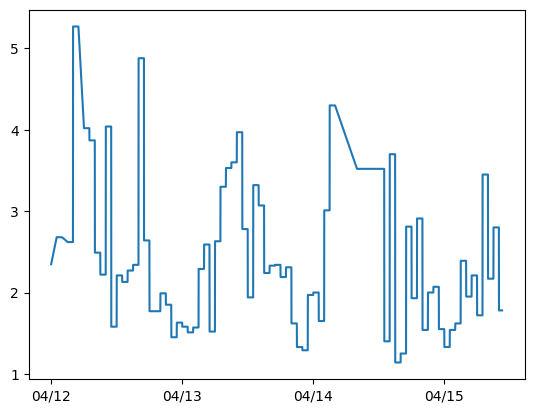

In [52]:
def plot_index(data, date=[], start_index=0, end_index=0):
    date_ticks = []
    current_date = ''
    data = data[start_index:end_index]
    date = date[start_index:end_index]
    date = [x.strftime('%m/%d') for x in date] # ex: 10/14
    for i,dt in enumerate(date):
        if dt != current_date:
            current_date = dt
            date_ticks.append([start_index+i,dt])
    date_ticks = np.array(date_ticks)
    plt.plot(data)
    print(date_ticks, date_ticks[:,0].astype(int), date_ticks[:,1])
    plt.xticks(date_ticks[:,0].astype(int), date_ticks[:,1])
    # data.loc[interval_index].plot()
plot_index(data_y, datelist, start_index, end_index)

[['85133' '04/12']
 ['89453' '04/13']
 ['93773' '04/14']
 ['98093' '04/15']] [85133 89453 93773 98093] ['04/12' '04/13' '04/14' '04/15']


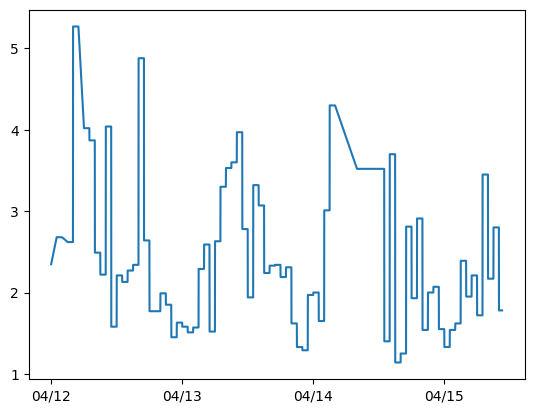

In [53]:
plot_index(data_y, datelist, idx_start_0412, idx_end_0417)

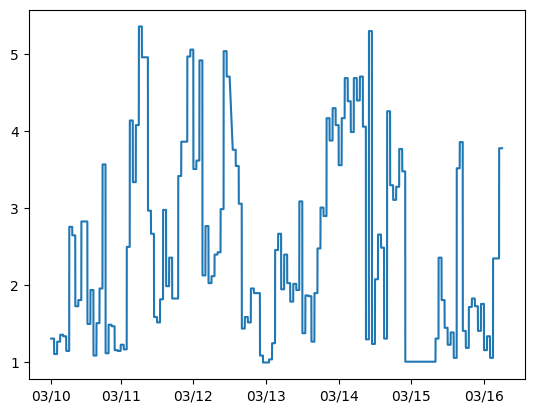

In [71]:
plot_index(data_y, datelist, idx_start_0310, idx_end_0317)

<AxesSubplot: >

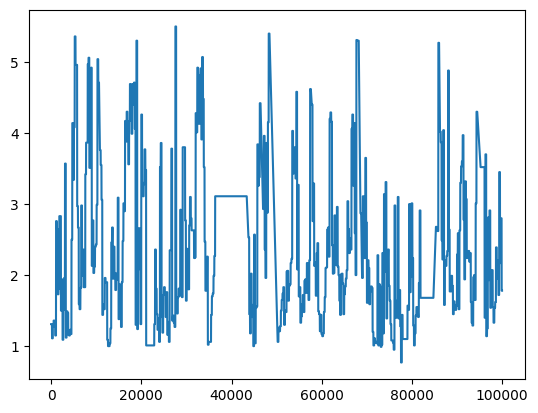

In [59]:
data_y.plot()

In [4]:
# min hour day
3*60*24

4320

### 計算平均每幾個樣本點，y值才會改變

In [6]:
data = pd.read_csv("../MDS_Assignment3 Mining Process/MiningProcess_Flotation_Plant_Database.csv")
data = data.replace(",", ".", regex=True) 
data_y = data.iloc[:, -1].astype(float) # label
del data

In [7]:
interval_list = []
interval_start = 0
interval_end = 0
current_yval = 0
for i, yval in enumerate(data_y):
    if yval == current_yval:
        interval_end += 1
    else:
        current_yval = yval
        interval = i - interval_start
        interval_start = i
        interval_end = i
        interval_list.append(interval)
    #     print('interval:', interval)
    # print('interval_start:', interval_start, '| i, yval:', i, yval)
    # if i == 1000:
    #     break

In [8]:
# interval_arr = np.array(interval_list)
print('len', len(interval_list))
print('max', max(interval_list))
print('min', min(interval_list))
print('mean', np.mean(interval_list))
print('median', np.median(interval_list))
counts = np.bincount(interval_list)
print('most', np.argmax(counts)) # 1 出現 55800 次

len 59141
max 13140
min 0
mean 12.46636005478433
median 1.0
most 1


In [9]:
counts

array([    1, 55800,     0, ...,     0,     0,     1], dtype=int64)

### 第564471筆資料~第576971筆，共 13140 筆相同y值的資料，刪掉此段數據重作分析

In [10]:
type(data_y)

data_y_drop = data_y.drop(data_y.index[list(range(442471+122000,442471+134500))])
print(len(data_y), len(data_y_drop))

737453 724953


In [11]:
len(data_y)*0.6

442471.8

In [12]:
data_y[442471+122001]

2.08

In [13]:
interval_list = []
interval_start = 0
interval_end = 0
current_yval = 0
for i, yval in enumerate(data_y_drop):
    if yval == current_yval:
        interval_end += 1
    else:
        current_yval = yval
        interval = i - interval_start
        interval_start = i
        interval_end = i
        interval_list.append(interval)
    #     print('interval:', interval)
    # print('interval_start:', interval_start, '| i, yval:', i, yval)
    # if i == 1000:
    #     break
print('len', len(interval_list))
print('max', max(interval_list)) # 最多連續 7020 個樣本的 y 值沒變化
print('min', min(interval_list))
print('mean', np.mean(interval_list))
print('median', np.median(interval_list))
counts = np.bincount(interval_list)
print('most', np.argmax(counts)) 

len 59141
max 7020
min 0
mean 12.255000760893457
median 1.0
most 1


### 既然平均 mean = 12 個樣本點 y 值才改變一次，取 ticks = 12 試試看

In [3]:
data = pd.read_csv("../MDS_Assignment3 Mining Process/MiningProcess_Flotation_Plant_Database.csv")
data = data.replace(",", ".", regex=True) 

In [4]:
from datetime import datetime # generate
from dateutil import parser # parse

# data['% Silica Concentrate'][0]
# data_X = data.iloc[:, 1:-2].astype(float) # params
# data_y = data.iloc[:, -1].astype(float) # label


In [5]:
def reduce(data, ticks=5, proportion=0.3):
    print('original data.shape:', data.shape)
    data = data[0:len(data):ticks] # ticks
    data =data.reset_index(drop=True)
    print('after apply ticks data.shape:', data.shape)
    data = data[0:int(len(data)*proportion)] # proportion
    data =data.reset_index(drop=True)
    print('after apply proportion data.shape:', data.shape)
    try:
        start = data.loc[0, 'date']
        end = data.loc[len(data)-1, 'date']
        print(f'Datetime interval: {start} ~ {end}')
    except:
        pass
    return data

data = reduce(data, ticks=12, proportion=1)

data_X = data.iloc[:, 1:-2].astype(float) # params
data_y = data.iloc[:, -1].astype(float) # label
datelist = [parser.parse(d) for d in data['date']]
days = set()
[days.add(x.strftime('%m/%d')) for x in datelist]
datelist = datelist[:len(data)]

original data.shape: (737453, 24)
after apply ticks data.shape: (61455, 24)
after apply proportion data.shape: (61455, 24)
Datetime interval: 2017-03-10 01:00:00 ~ 2017-09-09 23:00:00


In [42]:
# 取 3/10~3/16 7天的資料
interval_index = []
start_index = 0
end_index = 0
for i,dt in enumerate(datelist):
    if dt.month == 3 and dt.day in list(range(12,17)): # 此行設定區間
        if start_index == 0:
            start_index = i
        end_index = i
        # interval_index.append(i)
# print(len(interval_index))
print('from idx', start_index, ',dest idx' , end_index)

from idx 705 ,dest idx 2234


In [43]:
def plot_index(data, date=[], start_index=0, end_index=0):
    date_ticks = []
    current_date = ''
    data = data[start_index:end_index]
    date = date[start_index:end_index]
    date = [x.strftime('%m/%d') for x in date] # ex: 10/14
    for i,dt in enumerate(date):
        if dt != current_date:
            current_date = dt
            date_ticks.append([start_index+i,dt])
    date_ticks = np.array(date_ticks)
    plt.plot(data)
    # print(date_ticks, date_ticks[:,0].astype(int), date_ticks[:,1])
    plt.xticks(date_ticks[:,0].astype(int), date_ticks[:,1])
    for d_i, (i, d_str) in enumerate(date_ticks):
        if d_i == len(date_ticks)-1:
            numOfRercord = end_index - int(i)
        else:
            numOfRercord = int(date_ticks[d_i+1][0]) - int(i)
        print(f"{d_str} has {numOfRercord} of records.")

03/12 has 360 of records.
03/13 has 360 of records.
03/14 has 360 of records.
03/15 has 360 of records.
03/16 has 89 of records.


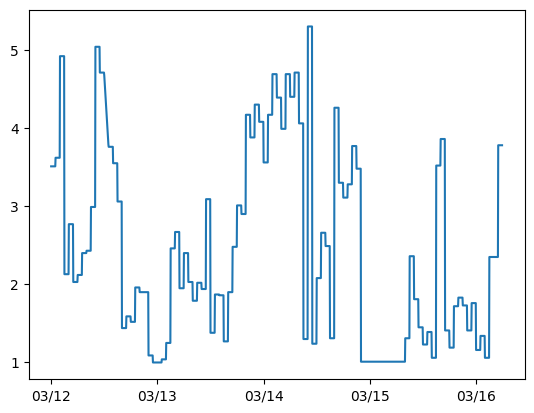

In [44]:
plot_index(data_y, datelist, 705, 2234)

取 4/10~4/16 7天的資料

In [9]:
# 取 3/10~3/16 7天的資料
interval_index = []
start_index = 0
end_index = 0
for i,dt in enumerate(datelist):
    if dt.month == 4 and dt.day in list(range(12,17)): # 此行設定區間
        if start_index == 0:
            start_index = i
        end_index = i
        # interval_index.append(i)
# print(len(interval_index))
print('from idx', start_index, ',dest idx' , end_index)

from idx 7095 ,dest idx 8894


04/12 has 360 of records.
04/13 has 360 of records.
04/14 has 360 of records.
04/15 has 360 of records.
04/16 has 359 of records.


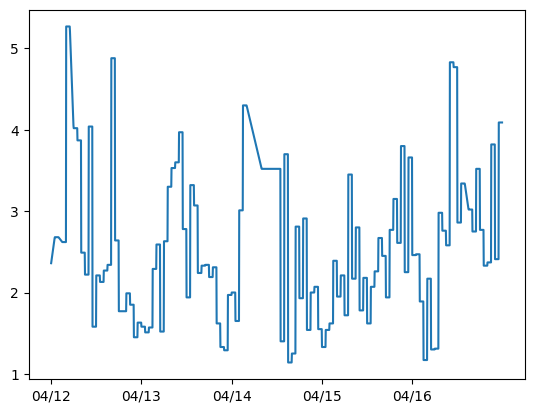

In [35]:
plot_index(data_y, datelist, 7095, 8894)

取 6/10~6/16 7天的資料

In [36]:
# 取 6/10~6/16 7天的資料
interval_index = []
start_index = 0
end_index = 0
for i,dt in enumerate(datelist):
    if dt.month == 6 and dt.day in list(range(12,17)): # 此行設定區間
        if start_index == 0:
            start_index = i
        end_index = i
        # interval_index.append(i)
# print(len(interval_index))
print('from idx', start_index, ',dest idx' , end_index)

from idx 29055 ,dest idx 30854


06/12 has 360 of records.
06/13 has 360 of records.
06/14 has 360 of records.
06/15 has 360 of records.
06/16 has 359 of records.


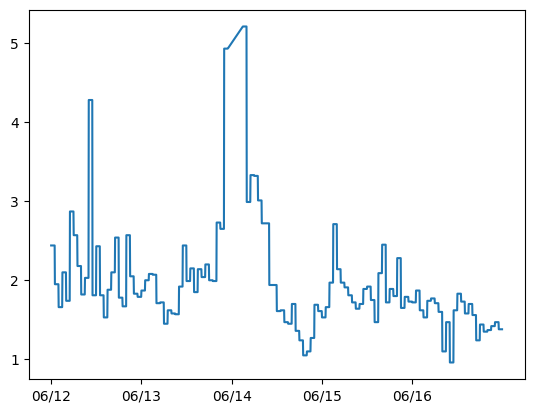

In [37]:
plot_index(data_y, datelist, 29055 , 30854)

取 5/10~5/16 7天的資料

In [38]:
# 取 5/10~5/16 7天的資料
interval_index = []
start_index = 0
end_index = 0
for i,dt in enumerate(datelist):
    if dt.month == 5 and dt.day in list(range(12,17)): # 此行設定區間
        if start_index == 0:
            start_index = i
        end_index = i
        # interval_index.append(i)
# print(len(interval_index))
print('from idx', start_index, ',dest idx' , end_index)

from idx 17895 ,dest idx 19694


05/12 has 360 of records.
05/13 has 360 of records.
05/14 has 360 of records.
05/15 has 360 of records.
05/16 has 359 of records.


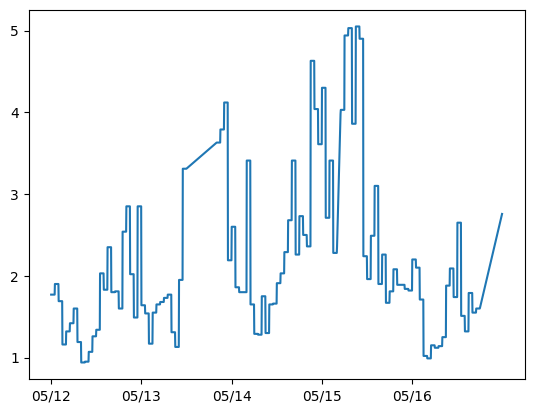

In [39]:
plot_index(data_y, datelist, 17895  , 19694)

### 若 Timestep 取 15 (一小時的區間)
結論: 1小時內往往還是看不到 y 軸變化... 因此 lstm 會不管用是有道理的
- Timestep = 15 (x) 一小時區間
- Timestep = 30 (o) 兩小時區間
- Timestep = 45 (o) 三小時區間

[['17995' '05/12']] [17995] ['05/12']


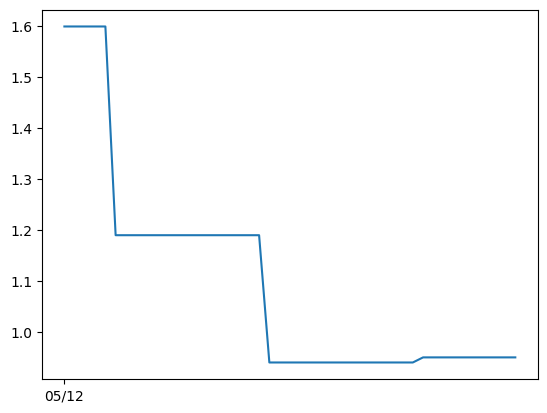

In [76]:
timestep = 15
plot_index(data_y, datelist, 17995 , 17995+timestep*3)

[['29055' '06/12']] [29055] ['06/12']


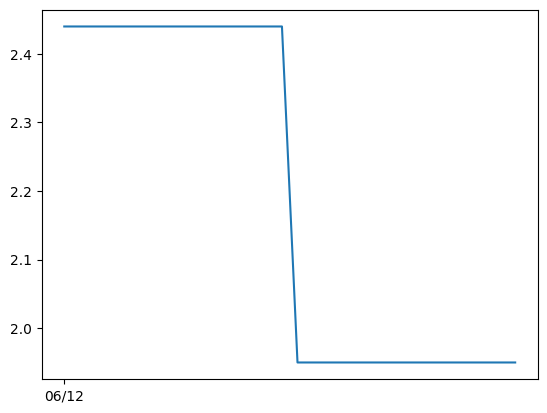

In [85]:
plot_index(data_y, datelist, 29055 , 29055+timestep*2)

[['30854' '06/16']
 ['30855' '06/17']] [30854 30855] ['06/16' '06/17']


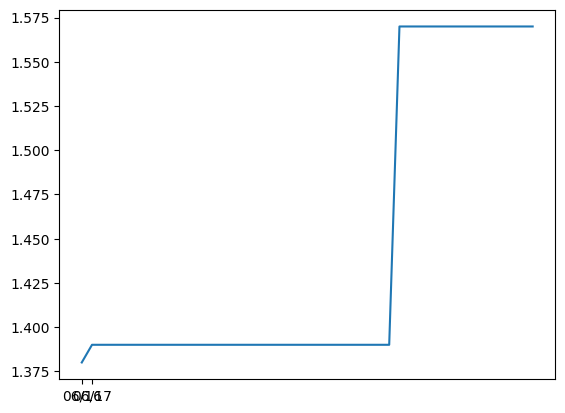

In [86]:
plot_index(data_y, datelist, 30854 , 30854+timestep*3)